# Assignment 3

**Task**: forecast the real price of gasoline for the US

**Dataset**: gasoline.xlsx contains two monthly time series. The nomial price of gasoline and the CPI

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib import style
import datetime
from dateutil.relativedelta import relativedelta
from statsmodels.graphics.tsaplots import plot_acf
import math

plt.style.use('mystyle.mplstyle')

In [34]:
def make_a_line():
    ax.plot([0.12, .9],                  # Set width of line
        [1.05, 1.05],                  # Set height of line
        transform=fig.transFigure,   # Set location relative to plot
        clip_on=False, 
        color='#E3120B', 
        linewidth=.6)
def make_a_rec():
    ax.add_patch(plt.Rectangle((0.12,1.05),                 # Set location of rectangle by lower left corder
                           0.04,                       # Width of rectangle
                           -0.02,                      # Height of rectangle. Negative so it goes down.
                           facecolor='#E3120B', 
                           transform=fig.transFigure, 
                           clip_on=False, 
                           linewidth = 0))
    
def make_title(text):
    ax.text(x=0.12, y=0.98, s=text, 
            transform=fig.transFigure, ha='left', 
            fontsize=13, weight='bold', alpha=.8)
    
def make_description(text):
    ax.text(x=0.12, y=0.93, s=text, 
            transform=fig.transFigure, ha='left', 
            fontsize=11, alpha=.8)
    
def plot(title, text):
    make_a_line()
    make_a_rec()
    make_title(title)
    make_description(text)

In [71]:
df = pd.read_excel("gasoline.xls", index_col= 0)
df.columns = ['nominal_price', 'cpi']

## Real Price of Gasoline

In [72]:
df['real_price'] = (df['nominal_price']/df['cpi'])*100

## Plot Real and Nominal Prices

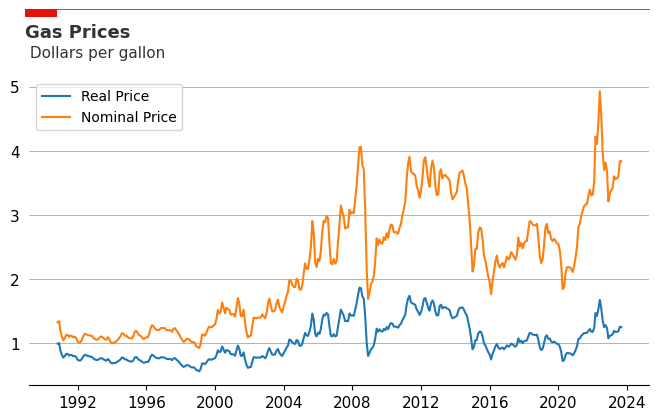

In [73]:
fig, ax = plt.subplots()

ax.plot(df.index, df.real_price, zorder = 2, label = 'Real Price')
ax.plot(df.index, df.nominal_price, zorder = 2, label = 'Nominal Price')
plt.ticklabel_format(style='plain', axis='y')
plt.legend()
plot('Gas Prices'," Dollars per gallon")
#plt.savefig('GDP.png')

## ACF

We will now on work with logs

In [74]:
df['real_price'] = np.log(df.real_price)
df['nominal_price'] = np.log(df.nominal_price)
df['delta_real'] = (df['real_price'] - df['real_price'].shift(1))
df['delta_real'].fillna(0, inplace = True)

In [76]:
dtrain = df[:'2014-12-01']
dtest = df['2015-01-01':]